In [1]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scripts.plot import plot_df

df = pd.read_csv("./data/01_processed_output.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').asfreq('D')
df = df.temperature
df.tail()

date
2022-03-27    20.9
2022-03-28    17.0
2022-03-29    18.7
2022-03-30    21.9
2022-03-31    23.5
Freq: D, Name: temperature, dtype: float64

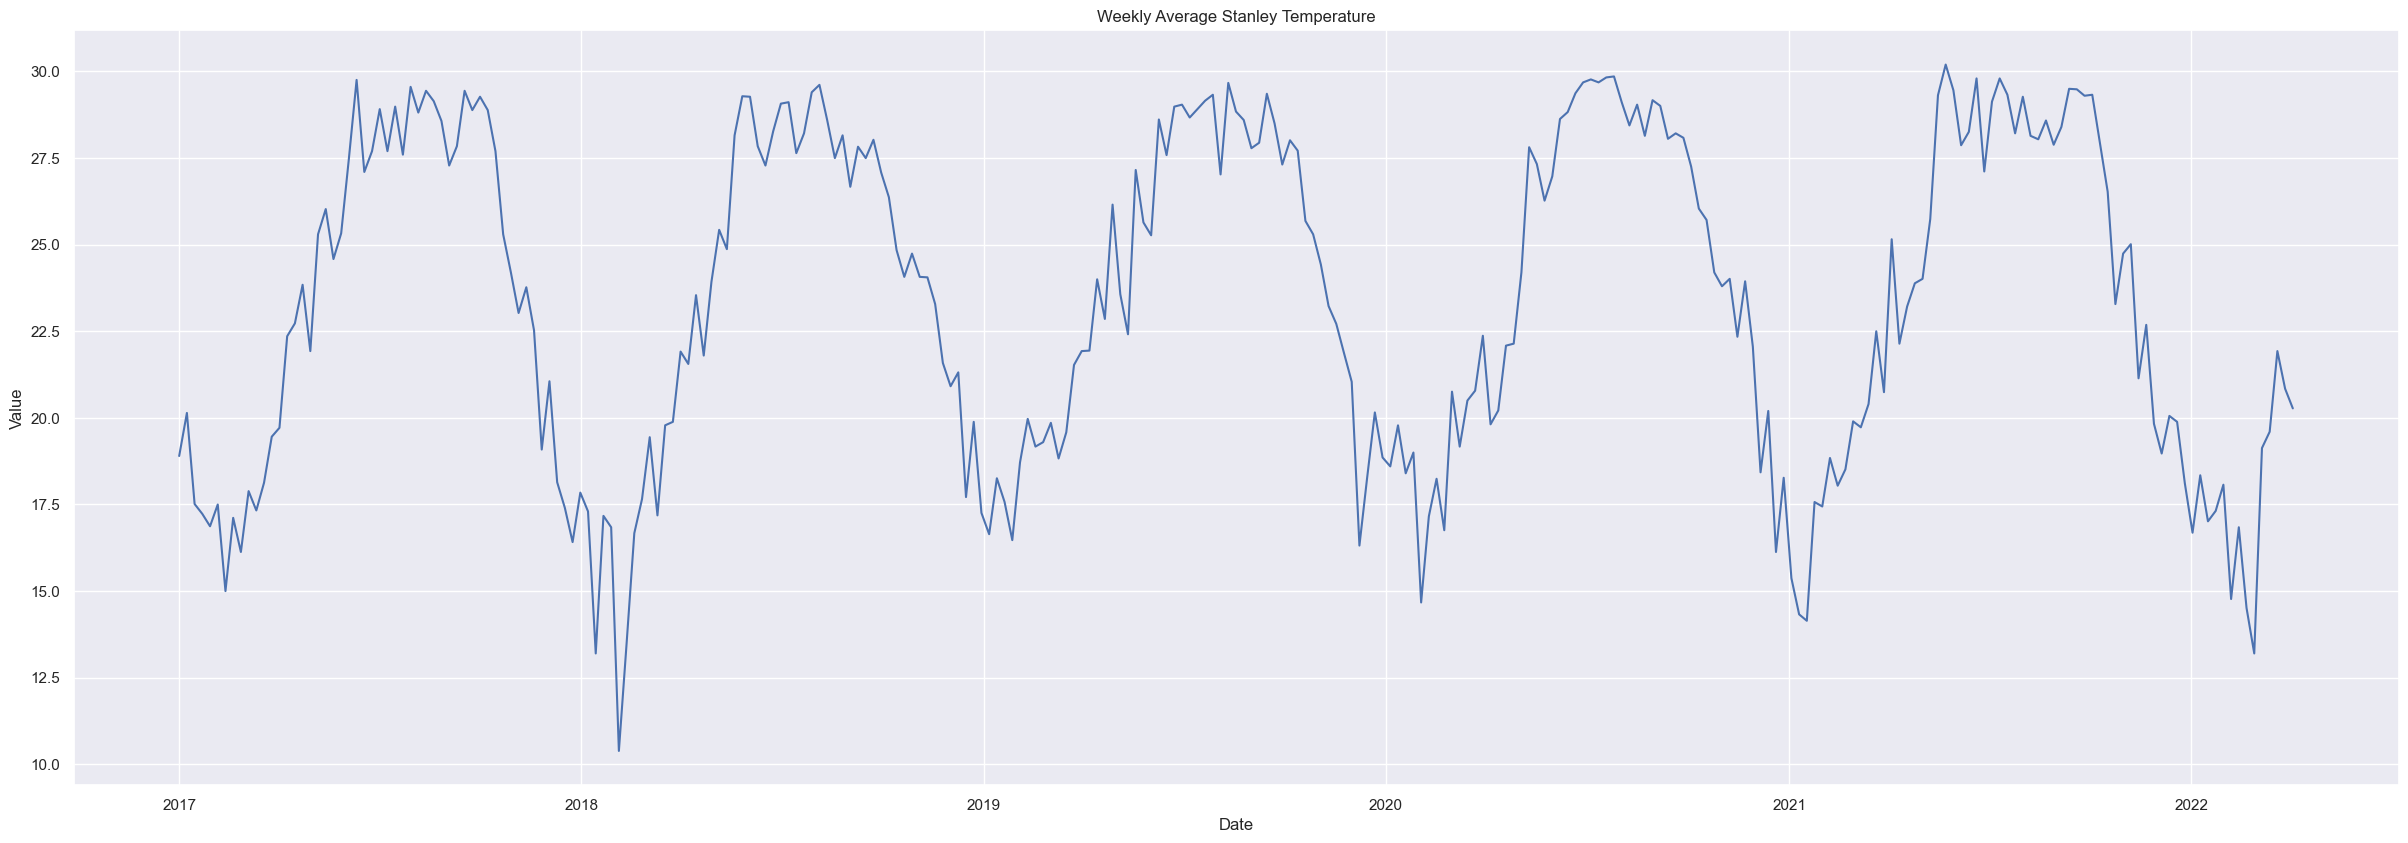

In [16]:
# Draw Plot
sns.set_theme()

start="2017-01-01"
range_df = df.loc[start:]
df_week = range_df.resample('W').mean()

# sns.lineplot(data=range_df,x=range_df.index,y=range_df.values)
plot_df(df_week, title='Weekly Average Stanley Temperature')  

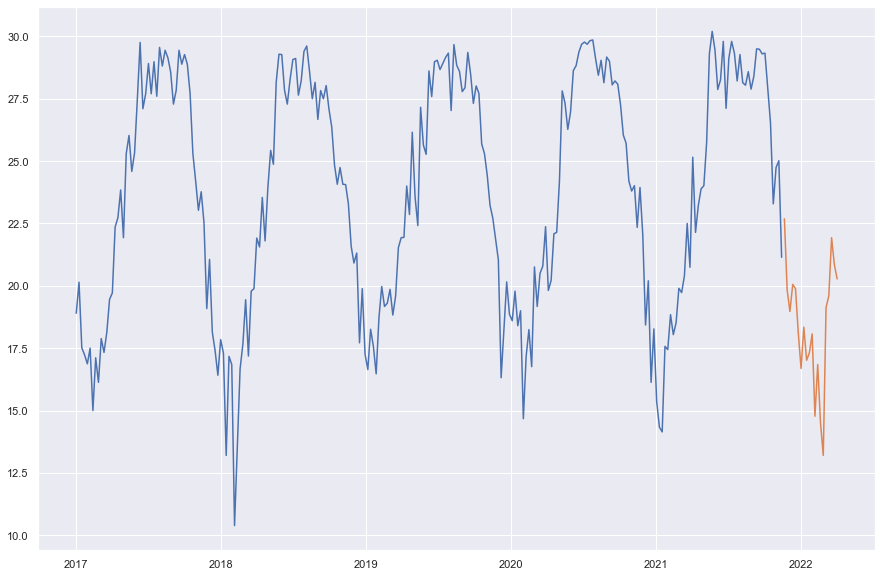

In [34]:
# Create Training and Test
test_size = 20  
train = df_week[:-test_size]
test = df_week[-test_size:]
# print(train[-5:])
# print(test)

plt.figure(figsize=(15, 10))
plt.plot(train[:])
plt.plot(test)


In [4]:
# stepwise_model = auto_arima(
#     train, d=1, seasonal=True, m = 365, trace=True, suppress_warnings=True, stepwise=True
# )


$SARIMA(p,d,q)(P,D,Q)m$

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                SARIMAX Results                                 
Dep. Variable:              temperature   No. Observations:                  255
Model:             ARIMA(1, 1, [1], 52)   Log Likelihood                -391.813
Date:                  Mon, 18 Apr 2022   AIC                            789.625
Time:                          12:14:23   BIC                            799.565
Sample:                      01-01-2017   HQIC                           793.646
                           - 11-14-2021                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.2170      0.124     -1.754      0.080      -0.459       0.026
ma.S.L52      -0.6386      0.215     -2.968      0.003      -1.060      -0.217
sigma2         2.2567      0.332    

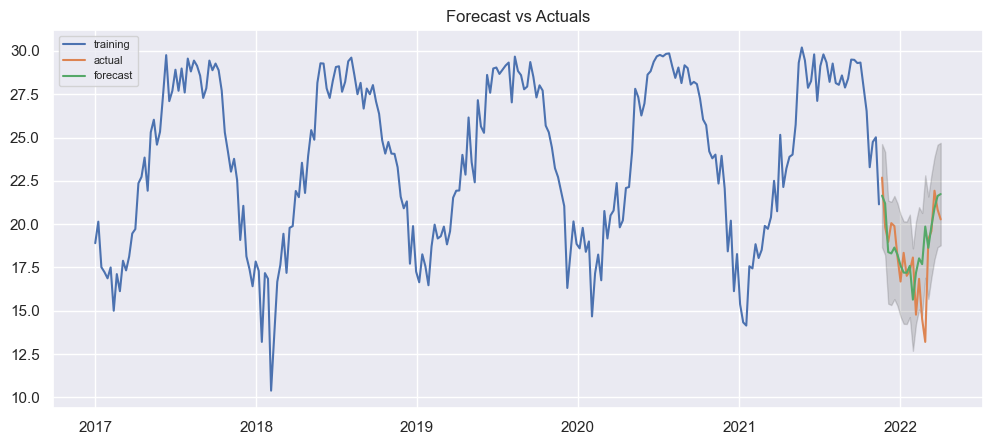

In [40]:
model = ARIMA(train, order=(0,0,0), seasonal_order=(4,1,0,52))
# model = ARIMA(train, order=(1,1,1))
fitted = model.fit()  
type(fitted)
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(test_size)
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05) # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

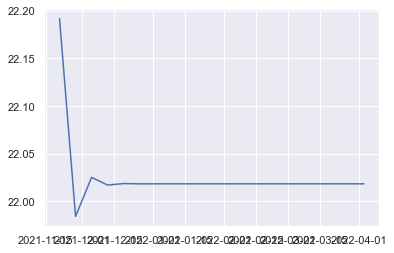

In [38]:
# plt.plot(train, label='training')
plt.plot(fc_series, label='forecast')

In [7]:
fitted.get_forecast(test_size)
fitted.

SyntaxError: invalid syntax (Temp/ipykernel_504/1190479232.py, line 2)

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)